In [16]:
import numpy as np
import matplotlib.pyplot as plt
from matricesRalas import *

FUNCIONES AUXILIARES

In [17]:
#funciones auxiliares 
def generar_idt(m):
    
    B = MatrizRala(m,m)
    for i in range(B.shape[0]):
        B.__setitem__((i,i),1)
    
    return B
       

        
def generar_inv(A): 
    if A.shape[0] != A.shape[1]:
        raise ValueError("la matriz no es cuadrada")
        
    identidad = generar_idt(A)
    resultado = MatrizRala(A.shape[0],A.shape[0])
        
    for i in range(A.shape[0]):
        for j in range(A.shape[0]):
            resultado[i,j] = A[i,j]
        
    for i in range(A.shape[0]):
        factor = 1.0 / A[i,i]
            
        for j in range(A.shape[0]):
            resultado[i,j] *= factor
            identidad[i,j] *= factor
                
        for k in range(A.shape[0]):
            if k!=i:
                factor = resultado[k,i]
                    
                for j in range(A.shape[0]):
                    resultado[k,j] -= factor*resultado[i,j]
                    identidad[k,j] -= factor*identidad[i,j]
                        
    return identidad   

In [18]:
def generarD(W:MatrizRala):
    resultado = MatrizRala(W.shape[0],W.shape[1])
    
    for i in range(W.shape[0]):
        cantidad_1s = 0
        for j in range(W.shape[0]):
            if W[i,j] == 1:
                cantidad_1s += 1
        if cantidad_1s != 0:
            resultado[i,i] = 1/cantidad_1s
        
    return resultado

In [19]:
def calcular_norma_l1(A:MatrizRala, B:MatrizRala):
    
    # Verificar que los vectores tengan la misma longitud
    if A.shape[0] != B.shape[0]:
        raise ValueError("Los vectores deben tener la misma longitud.")
    
    # Calcular la norma L1 de la diferencia entre los vectores
    dif = []
    for i in A.shape[0]:
        diferencia_absoluta = abs(A[i,0] - B[i,0])
        dif.append(diferencia_absoluta)
    
    norma_l1 = sum(diferencia_absoluta)
    
    return norma_l1



In [20]:
def fillMatrix(mat:MatrizRala):
    # CITAS A-0
    mat[0,2] = 1
    mat[0,3] = 1
    mat[0,4] = 1

    # CITAS B-1
    mat[1,0] = 1

    # CITAS C-2

    # CITAS D-3

    # CITAS E-4
    mat[4,10] = 1

    # CITAS F-5
    mat[5,0] = 1
    mat[5,6] = 1

    # CITAS G-6
    mat[6,7] = 1
    mat[6,8] = 1

    # CITAS H-7
    mat[7,8] = 1

    # CITAS I-8
    mat[8,5] = 1

    # CITAS J-9
    mat[9,8] = 1
 

    # CITAS K-10

In [21]:
# GRAFICO:
# [A,B,C,D,E,F,G,H,I,J,K]
# [0,1,2,3,4,5,6,7,8,9,10]
# [ac][ad][ae] [ba] [ek] [fg, fa] [gh,gi,ga] [hi] [if] [ji]

# [0,0,0,1,4,5,5,6,6,6,7,8,9]
# [2,3,4,0,10,6,0,7,8,0,9,5,8]

# W ij = 1 , si pj cita a pi i: el citado j: el que cita 

Numpy

In [22]:
##creo W y D con numpy:
filas = [0,0,0,1,4,5,5,6,6,6,7,8,9]
columnas = [2,3,4,0,10,6,0,7,8,0,9,5,8]

   
W = np.zeros((11, 11))
W[filas,columnas] = 1

   
D = np.zeros((11, 11))
for i in range(len(W)):
    cantidad_1s = 0
    for j in range(len(W)):
        if  W[i,j] == 1:
            cantidad_1s += 1
    if cantidad_1s != 0:
        D[i,i] = round((1/cantidad_1s),2)
        

In [23]:
 ##calculo p*
 #p* = (1-d)(I)/N + (d)WDp*
    #p*: vector de probabilidades
    #N: tamaño de la matriz = cantidad de filas 
    #d = probabilidad aleatoria de continuar leyendo alguno de los trabajos citados 
    #W =  matriz qu eindic acual paper cito a otro 
    #D = matriz que en la diagonal indica la 1/cantidad de veces que ese paper fue citado
    #I: matri de unos con R^n
    #reordenado
    #A = (I - dWD)
    #x = p*
    #b = (1-d)I/N
    
# Método Iterativo

# max_iterations = 100
# p_t = np.ones((N, 1)) / N  # Distribución equiprobable como probabilidad inicial
# diff_abs = []

# for t in range(max_iterations):
#     p_t_plus_1 = (1 - d) * np.dot(W.T, p_t) + d * b
#     diff = np.abs(p_t_plus_1 - p_star)
#     diff_abs.append(np.linalg.norm(diff, ord=1))  # Usar norma L1 para la diferencia absoluta
#     p_t = p_t_plus_1
    
d = 0.85
N = W.shape[0]
I = np.eye(N)

A = I - (d*(np.dot(W,D)))
    
A_1 = np.linalg.pinv(A)
    
    
b = ((1-d)/N)*I #creo que es un veftor de 1 s no mat identidad
 
p_star = np.dot(A_1,b)



Matrices Ralas

In [24]:
### creo W y D con matrices ralas

W = MatrizRala(11,11)
fillMatrix(W)

D = generarD(W)

In [25]:
### calculo p* usando gauss jordan

#p* = (1-d)(I)/N + (d)WDp*
#p*: vector de probabilidades
#N: tamaño de la matriz = cantidad de filas 
#d = probabilidad aleatoria de continuar leyendo alguno de los trabajos citados 
#W =  matriz qu eindic acual paper cito a otro 
#D = matriz que en la diagonal indica la 1/cantidad de veces que ese paper fue citado
#I: matrix identidad
#A = I -dWD
#b = (1-d)/n * I
#p* = x

N = W.shape[0]
I = generar_idt(N)

d = 0.85
WD = W @ D
A = I - (d * WD)

unos = MatrizRala(W.shape[0],1)

for i in range(unos.shape[0]):
    unos[i,0] = 1

b = ((1 - d)/N) * unos

p_star = GaussJordan(A,b)



MatrizRala([ 
    [ 0.02522727272727273  ]
    [ 0.020784090909090912  ]
    [ 0.01363636363636364  ]
    [ 0.01363636363636364  ]
    [ 0.01363636363636364  ]
    [ 0.05673309447705534  ]
    [ 0.0845858907481516  ]
    [ 0.045722103107108975  ]
    [ 0.03774792878911216  ]
    [ 0.045722103107108975  ]
    [ 0.01363636363636364  ]
])


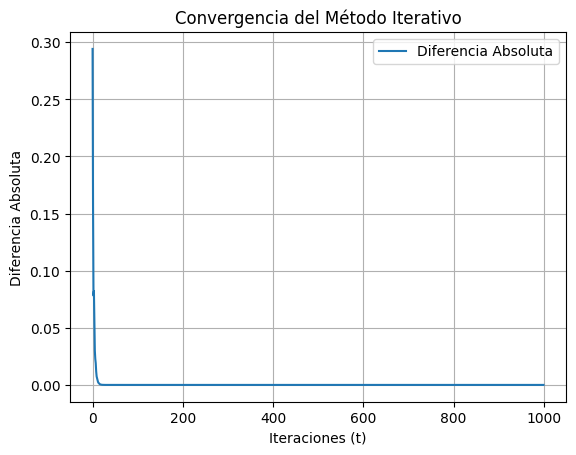

In [26]:
#calculo utilizando metodo iterativo 

# Vector de probabilidades inicial con distribución equiprobable
p = MatrizRala(N,1)
for i in range(N):
    p[i,0] = 1/N
    
unos = MatrizRala(N,1)
for i in range(N):
    unos[i,0] = 1
    
# Método iterativo de PageRank
tolerancia = 0.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000001
max_iteraciones = 1000
diferencias = []


for t in range(max_iteraciones):
    p_previo = p.__copy__()
    parte_div = (1 - d) / N
    WD = W @ D
    WDP_t = WD @ p_previo
    p = parte_div * unos + d *WDP_t
    
    dif = 0
    # Calcular la diferencia absoluta entre p y p*
    for i in range(p.shape[0]):
        diferencia_absoluta = abs(p[i,0] - p_star[i,0])
        dif += diferencia_absoluta
    
    diferencias.append(dif)
    
    if dif < tolerancia:
        print(f"Convergencia alcanzada en la iteración {t + 1}.")
        break

# Graficar la diferencia absoluta vs. t
plt.figure()
plt.plot(range(max_iteraciones), diferencias, label='Diferencia Absoluta')
plt.xlabel('Iteraciones (t)')
plt.ylabel('Diferencia Absoluta')
plt.title('Convergencia del Método Iterativo')
plt.legend()
plt.grid(True)
plt.show() 
    
    

Codigo Guido

In [27]:

def getMatDNump(W:np.ndarray)->np.ndarray:
    D = np.zeros_like(W)
    for i in range(D.shape[0]):
        if sum(W[i,:]) != 0:
            D[i,i] = 1/sum(W[i,:])
    return D

def getMatD(W:MatrizRala):
    N = W.shape[0]
    D = MatrizRala(N,N)
    for i in range(D.shape[0]):
        fila_i = W.return_fila_entera(i)
        cantCitas = fila_i.count(1)
        if cantCitas != 0:
            D[i,i] = cantCitas
    return D
    
def nextP(P:np.ndarray,W,D,d)->np.ndarray:
    termino_1 = 1-d / W.shape[0]
    termino_1 = np.zeros_like(P) + 1 * termino_1
    termino_2 = d * W @ D @ P
    return termino_1 + termino_2


In [28]:

def mainNumpy():
    N = 11
    d = 0.85
    W = np.zeros((N,N))
    P = np.zeros((N,1)) + 1/N

    # CITAS A-0
    W[0][2] = 1
    W[0][3] = 1
    W[0][4] = 1

    # CITAS B-1
    W[1][0] = 1

    # CITAS C-2

    # CITAS D-3

    # CITAS E-4
    W[4][10] = 1

    # CITAS F-5
    W[5][0] = 1
    W[5][6] = 1

    # CITAS G-6
    W[6][7] = 1
    W[6][8] = 1

    # CITAS H-7
    W[7][8] = 1

    # CITAS I-8
    W[8][5] = 1

    # CITAS J-9
    W[9][8] = 1
 

    # CITAS K-10

    
    D = getMatDNump(W)


    print("INICIO: \n")

    for i in range(10):
        newP = nextP(P,W,D,d)
        P = newP

    print(P)

def main():
    N = 11
    d = 0.85
    W = MatrizRala(N,N)
    # print(W)
    fillMatrix(W)
    # print(W)
    D = getMatD(W)
    # print(D)

    # P* = (1-d)/N 1 + d * W @ D * P*
    # P* - dWDP* = (1-d)/N * 1
    # (1 - dWD)P* = (1-d)/N * 1
    #     A     x =  b

    # A

    oneMat = MatrizRala.One(N)
    dWD = d * W @ D
    A = oneMat - dWD
    # print(A)

    # b
    b = MatrizRala(N,1)
    for i in range(N):
        b[i,0] = 1
    b = ((1-d)/N) * b

    x = GaussJordan(A,b)

    print(x)
    # print("MAT_ONE")
    # print(oneMat)


if __name__ == "__main__":
    mainNumpy()
    main()

INICIO: 

[[1.70704545]
 [1.40639015]
 [0.92272727]
 [0.92272727]
 [0.92272727]
 [3.72667677]
 [5.5437113 ]
 [3.01099896]
 [2.48325015]
 [3.01099896]
 [0.92272727]]
MatrizRala([ 
    [ 0.02522727272727273  ]
    [ 0.0779659090909091  ]
    [ 0.01363636363636364  ]
    [ 0.01363636363636364  ]
    [ 0.01363636363636364  ]
    [ -0.04437990473143279  ]
    [ -0.07196812577784817  ]
    [ -0.03890168960964767  ]
    [ -0.06180947440707212  ]
    [ -0.03890168960964767  ]
    [ 0.01363636363636364  ]
])
